### Registration ID : GO_STP_9654

Spam Classification using Multinomial Naive Bayes Text classification using Multinomial Naive Bayes Example

Build a spam filter using Python and the multinomial Naive Bayes algorithm. 

Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.corr()

""


In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=5572, step=1)

In [7]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

<AxesSubplot:>

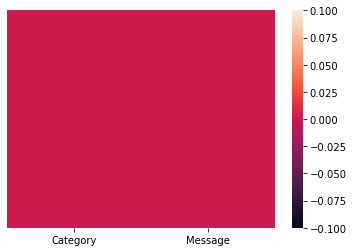

In [9]:
sb.heatmap(df.isnull(), yticklabels=False) # check null values with the help of heatmap

### Label encoding to cateogrical variable i.e Category column

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [11]:
df["Category"] = le.fit_transform(df["Category"])
df["Category"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32

### Classify Features and Targets

In [12]:
x = df['Message']
print(x.ndim)
print(x.shape)
print(x.head(2))

1
(5572,)
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: Message, dtype: object


In [13]:
y = df['Category']
print(y.ndim)
print(y.shape)
print(y.head(2))

1
(5572,)
0    0
1    0
Name: Category, dtype: int32


### Text Processing

#### covert textual data into numeric form

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
count_vector = CountVectorizer()

In [16]:
xtrain = count_vector.fit_transform(x)

In [17]:
print(xtrain.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
xtrain.shape

(5572, 8709)

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
tfidf_transformer = TfidfTransformer()

In [21]:
xtrain_tfidf = tfidf_transformer.fit_transform(xtrain)

In [22]:
xtrain_tfidf.shape

(5572, 8709)

In [23]:
xtrain_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
# Divide data into training and testing
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(xtrain_tfidf, y, test_size = 0.3, random_state = 1)

In [25]:
# Create a Multinomial Model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [26]:
# Training model by providing training data
Mymodel = mnb.fit(xtrain, ytrain)

In [27]:
# Predcition
y_pred = Mymodel.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix and Accuracy score

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
cm

array([[1442,    0],
       [  75,  155]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy: {}%".format(accuracy*100))

Accuracy: 95.51435406698565%
